# Setting

In [82]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

In [83]:
path_data = 'data'
path_tran = 'transaction'

In [84]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250501.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR


In [5]:
WidgetUniverse

## K200

In [85]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-05-08 uploaded.
Price data loaded


In [86]:
#k200.portfolio_data
#k200.get_names()

In [87]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-05-09 downloaded.
kospi200_prices_250509.csv saved
df_prices updated
Execution time of download: 32 secs


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [88]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-05-08 uploaded.
Price data loaded


In [89]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [90]:
#PM.review_universe('UV_WTR')

In [91]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-05-09 downloaded.
etfs_weather_250509.csv saved
df_prices updated
Execution time of download: 1 secs


In [13]:
#wtr.save()

## FCTR

In [6]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2021-01-04 to 2024-12-13 uploaded.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## FUND

In [42]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded


In [43]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index
#tickers = None

TDF_2406: done
HANA_2408: done
SAVE_2503: done
SAVE_2504: done
FISA_2504: done


In [44]:
# FISA
#tickers = tickers + ['K55107BB0404','KR5101888398','K55210CO3737','KR5236AS4826','KR5370AP9949','KR5236AS4818']
len(tickers)

24

In [45]:
kw = dict(
    start_date = '2024-06-01', 
    #close_today = WidgetUniverse.values(1),
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 315 funds loaded.
23 tickers set to download


100%|███████████████████████████████████████████████████████████████| 23/23 [00:32<00:00,  1.42s/it]

... done
23 securities from 2023-03-29 to 2025-05-08 downloaded.
funds_prices_250508.csv saved
df_prices updated
Execution time of download: 33 secs


In [20]:
#_ = fund.save()

funds_prices_250430.csv saved


In [16]:
#fund.portfolio_data['universe']

### Master

In [6]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55210CO3760,신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류C-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55210CO3737,신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e),삼성증권,일반,신한,주식혼합,TDF,글로벌
K55105CK1667,삼성한국형TDF2050증권투자신탁UH[주식혼합-재간접형]Ae,삼성증권,일반,삼성,주식혼합,TDF,글로벌
KR5370AP9949,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae,삼성증권,일반,AB,채권,채권,글로벌
KR5236AS4818,한국밸류10년투자증권투자신탁 1(주식)종류C-E,삼성증권,일반,한국밸류,주식,주식,국내


In [7]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [10]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [11]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [12]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

0

In [45]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [46]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  8.22it/s]


1.7 secs elapsed, 0.0 secs paused (0.0%)


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 10.12it/s]


0.2 secs elapsed, 0.0 secs paused (0.0%)
fundm_info_250501.csv saved


### Monthly

In [13]:
fund = PM.create_universe('UV_FNDM')

313 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 315 funds loaded.
Price data loaded


In [14]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse.values(0) else None

Master data for 315 funds loaded.
Update existing data with 2 tickers
2 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:19<00:00,  9.57s/it]

... done
315 securities from 2005-01-31 to 2025-03-31 downloaded.
fundm_prices_250331c_250331.csv saved
df_prices updated
Execution time of download: 19 secs


In [51]:
_ = fund.save()

fundm_prices_250430.csv saved


### Cost

*Check missing cost data*

In [12]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [13]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250425.csv loaded
22 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [14]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

22 securities from 2023-03-29 to 2025-04-30 uploaded.
Master data for 315 funds loaded.
Price data loaded
Master data for 315 funds loaded.
Cost data transaction_cost_250425.csv loaded
Cost data saved to transaction_cost_250501.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [12]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

23 securities from 2023-03-29 to 2025-05-07 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded


In [13]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']

In [14]:
fund.get_names(tickers)

0) K55234DF3150: IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re
1) K55214CD4825: 유진챔피언중단기채증권자투자신탁(채권)ClassC-Re
2) KR5236AS4818: 한국밸류10년투자증권투자신탁 1(주식)종류C-E

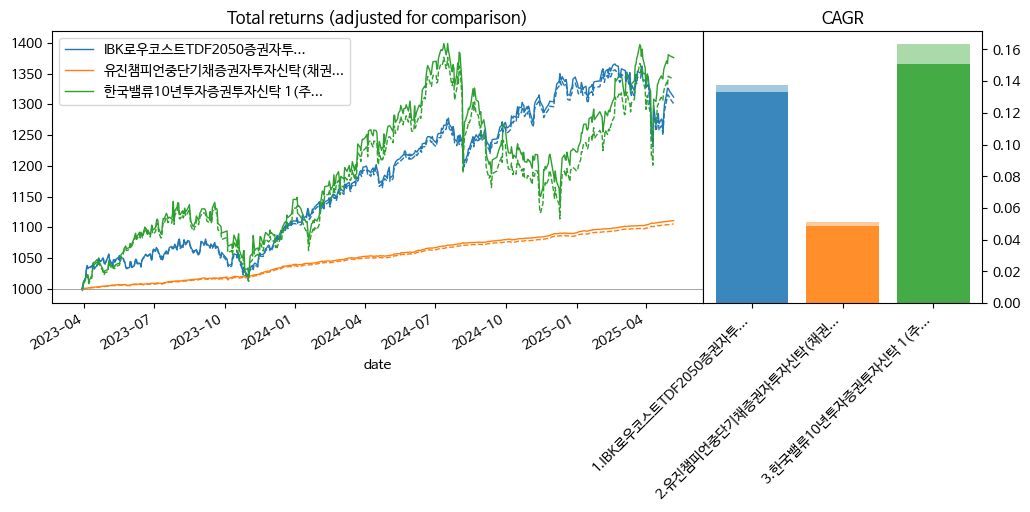

In [15]:
fund.plot(tickers, cost=cost, base=1000)

## LIQ

In [92]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [93]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-05-08 uploaded.
Price data loaded


In [94]:
#liq.get_names()

In [95]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.49it/s]

2.1 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-05-09 downloaded.
krx_liq_prices_250509.csv saved
df_prices updated
Execution time of download: 3 secs


## Additional Data

### Cost

*Check missing cost data*

In [35]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [36]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250424.csv loaded
300 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 300 funds loaded.
Price data loaded


### Financial Ratio

In [63]:
WidgetUniverse

In [64]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-04-25 loaded


In [65]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-05-08 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [15:35<00:00,  4.68s/it]


15.6 mins elapsed, 36.0 secs paused (3.8%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-05-08 downloaded
kospi200_ratios_250508.csv saved


In [66]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [67]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-05-08 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-05-08
Price: 2022-01-03 ~ 2025-05-08


# Performance

In [96]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, SAVE_2504, FISA_2504, FCTR


In [97]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-16 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
REMINDER: make sure this is 1st transaction as no records provided

WTR_2407:
6 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-02-13 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-12-18 loaded



In [107]:
pm.load('LIQ')
#pm.load('TDF_2406','HANA_2408')

LIQ:
24 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Transaction record to 2024-01-03 loaded



security_names updated
Data of tickers 009900, 016380 downloaded


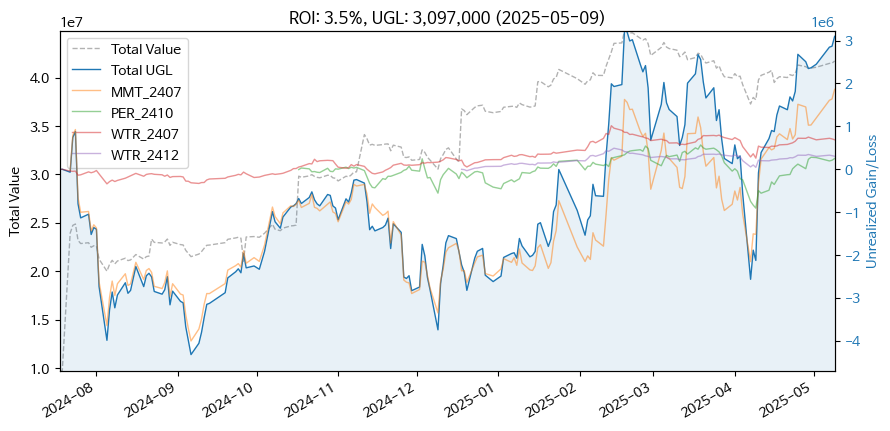

In [99]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [100]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [108]:
pm.summary(date=w_date.value, exclude_cost=True, int_to_str=False)

portfolio,LIQ,MMT_2407,PER_2410,WTR_2407,WTR_2412,TOTAL
start,2024-01-03,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-01-03
end,2025-05-09,2025-05-09,2025-05-09,2025-05-09,2025-05-09,2025-05-09
buy,6642078.0,60561900.0,12249820.0,10365272.0,5783200.0,95602270.0
sell,0.0,46870851.0,2621865.0,943120.0,0.0,50435836.0
value,3046438.0,15665800.0,9899507.0,10113899.0,6088129.0,44813773.0
ugl,-3595640.0,1974751.0,271552.0,691747.0,304929.0,-352661.0
roi,-0.541343,0.032607,0.022168,0.066737,0.052727,-0.003689


Custom category loaded: portfolio2


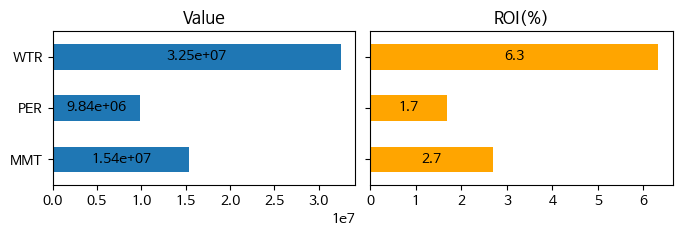

In [29]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df['portfolio'].str.split('_').str.get(0).rename('portfolio2')
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,2))

*print summary for google sheet 금융자산운용*

In [24]:
pm.util_print_summary(date=w_date.value)

2025-05-07, MMT, 2407, , , , 평가, , 60559696, 46784778, 15381437, 1606519, 0.0265
2025-05-07, PER, 2410, , , , 평가, , 12249374, 2617050, 9824378, 192054, 0.0157
2025-05-07, WTR, 2407, , , , 평가, , 10364836, 942797, 10142122, 720084, 0.0695
2025-05-07, WTR, 2412, , , , 평가, , 5782957, 0.0, 6109531, 326574, 0.0565


### All Funds

In [46]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=True)

TDF_2406:
23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-21 loaded

HANA_2408:
23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-08-01 loaded

SAVE_2503:
23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-03-17 loaded

SAVE_2504:
23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-21 loaded

FISA_2504:
23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-

In [47]:
pm.summary()

portfolio,FISA_2504,HANA_2408,SAVE_2503,SAVE_2504,TDF_2406,TOTAL
start,2025-04-28,2024-08-01,2025-03-17,2025-04-21,2024-06-19,2024-06-19
end,2025-05-08,2025-05-08,2025-05-08,2025-05-08,2025-05-08,2025-05-08
buy,"30,960,600","9,990,000","7,067,714","3,584,916","48,148,612","99,751,842"
sell,-252.0,0.0,0.0,0.0,"-102,860","-103,112"
value,"30,969,736","10,193,308","7,033,198","3,589,401","47,070,922","98,856,565"
ugl,"8,884","203,308","-34,516","4,485","-1,180,550","-998,389"
roi,0.000287,0.0204,-0.00488,0.00125,-0.0245,-0.01


In [27]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')

Custom category loaded: account, asset, manager, region, seller, strategy


In [28]:
file = 'funds_custom_category.csv'

# uncomment to save all tickers and their names 
#df = pm.util_performance_by_asset()
#df['name'].drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)

Custom category loaded: name2


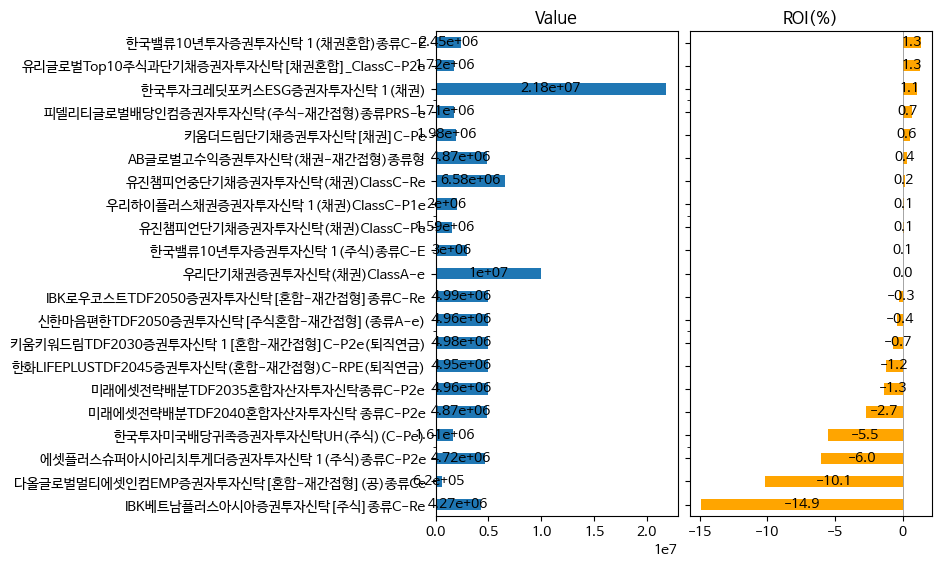

In [29]:
category = 'name2'
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

# Transaction

## MMT

In [130]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-16 loaded


In [11]:
# run after editting record file
pf_mmt.update_record()

In [12]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-03-14 000150           두산  340250            9    9     0.2    0.193   
           003230         삼양식품  923000           -1    3     0.2    0.175   
           010120  LS ELECTRIC  208500          -14    0     0.0    0.000   
           012450    한화에어로스페이스  751000           -1    3     0.2    0.189   
           042660         한화오션   76550           45   45     0.2    0.217   
           064350         현대로템  108300           33   33     0.2    0.225   
           267260     HD현대일렉트릭  356500           -9    0     0.0    0.000   
           298040        효성중공업  473000           -7    0     0.0    0.000   
2025-04-16 000150           두산  271999           -9    0     0.0    0.000   
           003230         삼양식품  932000            0    3     0.2    0.196   
           012450    한화에어로스페이스  788000            0    3     0.2    0.165   
           042660         한화오션   78099           -6   39     0.2    0.213   
           064350         현대로템  109200           -4   29     0.2    0.222   
           329180      HD현대중공업  364000            8    8     0.2    0.204   

                       date*  
date       ticker             
2025-03-14 000150 2025-03-17  
           003230 2025-03-17  
           010120 2025-03-17  
           012450 2025-03-17  
           042660 2025-03-17  
           064350 2025-03-17  
           267260 2025-03-17  
           298040 2025-03-17  
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17

*daily transactions for book keeping*

In [13]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

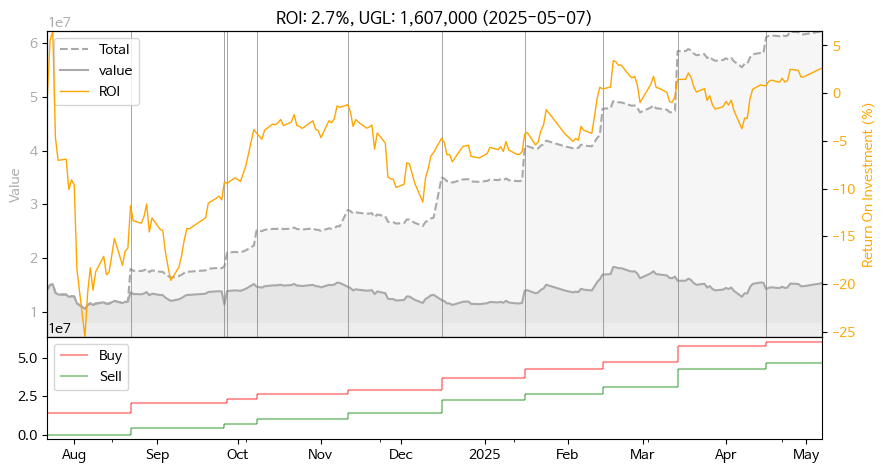

In [14]:
pf_mmt.plot(total=True)

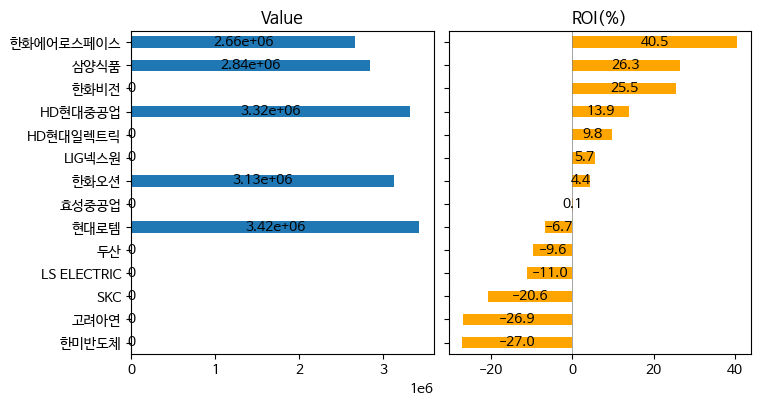

In [15]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=False)

In [131]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-05-09, 60559696, 46784778, 15636461, 1861543, 0.0307


start    2024-07-22
end      2025-05-09
buy      60,559,696
sell     46,784,778
value    15,636,461
ugl       1,861,543
roi          0.0307
dtype: object

In [18]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [20]:
kw = dict(
    #sell = ['010120'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_mmt.transaction_halt(**kw) 

Updated with transaction on 2025-05-07
Set save=True to save transaction record
ROI: 2.6%, UGL: 1,606,521 (2025-05-07)


In [45]:
date_actual = '2025-05-16'
capital = WidgetTransaction.values(1)
#capital = 0.1
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-04-30 to 2025-04-30
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 4 %
ROI: 2.6%, UGL: 1,606,553 (2025-05-07)
Set save=True to save transaction record


In [46]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-04-16 000150         두산  271999           -9    0     0.0    0.000   
           003230       삼양식품  932000            0    3     0.2    0.196   
           012450  한화에어로스페이스  788000            0    3     0.2    0.165   
           042660       한화오션   78099           -6   39     0.2    0.213   
           064350       현대로템  109200           -4   29     0.2    0.222   
           329180    HD현대중공업  364000            8    8     0.2    0.204   
2025-05-07 003230       삼양식품  950000            0    3     0.2    0.196   
           012450  한화에어로스페이스  890000            0    3     0.2    0.183   
           042660       한화오션   80400           -1   38     0.2    0.210   
           064350       현대로템  118300           -3   26     0.2    0.211   
           329180    HD현대중공업  415500           -1    7     0.2    0.200   

                       date*  
date       ticker             
2025-04-16 000150 2025-04-17  
           003230 2025-04-17  
           012450 2025-04-17  
           042660 2025-04-17  
           064350 2025-04-17  
           329180 2025-04-17  
2025-05-07 003230 2025-05-16  
           012450 2025-05-16  
           042660 2025-05-16  
           064350 2025-05-16  
           329180 2025-05-16

## KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [109]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-05-08 loaded


In [110]:
pf, date_actual = 'PER_2410', '2025-11-12'
#pf, date_actual = 'PER_2505', '2025-05-14'

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [111]:
tickers_liq = pf_per.check_universe()

In [114]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05    0.050   
           003030   세아제강지주  193300           -4    2    0.05    0.040   
           009970  영원무역홀딩스   85700           -5    4    0.05    0.045   
           016380     KG스틸    1012         -507  494    0.05    0.052   
           047040     대우건설    3635         -127  140    0.05    0.053   
           088350     한화생명    2864          180  180    0.05    0.054   
           078930       GS   41599           12   12    0.05    0.052   
           111770     영원무역   40150           11   11    0.05    0.050   
           139130  DGB금융지주    8250           63   63    0.05    0.054   
           005830   DB손해보험  106900            4    4    0.05    0.044   
           001450     현대해상   29750           17   17    0.05    0.053   
           009900     명신산업     991          500  500    0.05    0.052   
           241560     두산밥캣   40000           13   13    0.05    0.054   
           000270       기아   93600            5    5    0.05    0.049   
           024110     기업은행   14569           35   35    0.05    0.053   
           005850      에스엘   31350           16   16    0.05    0.052   
           316140   우리금융지주   16080           32   32    0.05    0.054   
           138930  BNK금융지주    9430           55   55    0.05    0.054   
           005380      현대차  209500            2    2    0.05    0.044   
           017800   현대엘리베이   46300            9    9    0.05    0.043   

                       date*  
date       ticker             
2024-11-11 010060 2024-11-11  
           003030 2024-11-11  
           009970 2024-11-11  
           016380 2024-11-11  
           047040 2024-11-11  
           088350 2024-11-11  
           078930 2024-11-11  
           111770 2024-11-11  
           139130 2024-11-11  
           005830 2024-11-11  
           001450 2024-11-11  
           009900 2024-11-11  
           241560 2024-11-11  
           000270 2024-11-11  
           024110 2024-11-11  
           005850 2024-11-11  
           316140 2024-11-11  
           138930 2024-11-11  
           005380 2024-11-11  
           017800 2024-11-11

In [113]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-05-09, 12249374, 2617050, 9880970, 248646, 0.0203


start    2024-10-17
end      2025-05-09
buy      12,249,374
sell      2,617,050
value     9,880,970
ugl         248,646
roi          0.0203
dtype: object

In [73]:
#pf_per.update_record()
#pf_per.view_record(-2)

In [74]:
pf_per.plot()

In [75]:
_ = pf_per.plot_assets(figsize=(8,6))

In [76]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

In [77]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [8]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    #halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
#_ = pf_per.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-04-25
security_names updated
Data of tickers 009900, 016380 downloaded
Tickers 009900, 016380 added to universe
Set save=True to save transaction record
ROI: 1.2%, UGL: 141,585 (2025-04-25)


In [80]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-03-10 to 2025-05-08
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 12 %
ROI: -0.2%, UGL: -16,639 (2025-05-08)
Set save=True to save transaction record


In [81]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-05-08 036460   한국가스공사   37700           13   13    0.05    0.054   
           402340    SK스퀘어   93000            5    5    0.05    0.051   
           009240       한샘   41750           11   11    0.05    0.051   
           015760     한국전력   26400           18   18    0.05    0.052   
           006360     GS건설   17830           28   28    0.05    0.055   
           000660   SK하이닉스  190300            2    2    0.05    0.042   
           000210       DL   33850           14   14    0.05    0.052   
           001740   SK네트웍스    4140          120  120    0.05    0.055   
           178920   PI첨단소재   16620           30   30    0.05    0.055   
           005250   녹십자홀딩스   13750           36   36    0.05    0.055   
           002710    TCC스틸   20400           24   24    0.05    0.054   
           326030   SK바이오팜   97900            5    5    0.05    0.054   
           088350     한화생명    2640          189  189    0.05    0.055   
           010060   OCI홀딩스   67100            7    7    0.05    0.052   
           001450     현대해상   21750           22   22    0.05    0.053   
           047040     대우건설    3500          142  142    0.05    0.055   
           009970  영원무역홀딩스   97400            5    5    0.05    0.054   
           078930       GS   38550           12   12    0.05    0.051   
           005830   DB손해보험   90800            5    5    0.05    0.050   

                        date*  
date       ticker              
2025-05-08 036460  2025-05-14  
           402340  2025-05-14  
           009240  2025-05-14  
           015760  2025-05-14  
           006360  2025-05-14  
           000660  2025-05-14  
           000210  2025-05-14  
           001740  2025-05-14  
           178920  2025-05-14  
           005250  2025-05-14  
           002710  2025-05-14  
           326030  2025-05-14  
           088350  2025-05-14  
           010060  2025-05-14  
           001450  2025-05-14  
           047040  2025-05-14  
           009970  2025-05-14  
           078930  2025-05-14  
           005830  2025-05-14

In [54]:
#pf_per.update_record()

## WTR
*modified all weather*

In [135]:
# pf & rebal date
#pf, date_actual = 'WTR_2407', '2025-08-14'
pf, date_actual = 'WTR_2412', '2025-06-18'

In [137]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-12-18 loaded


In [123]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [124]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-18 069500             KODEX 200   31911           30   30  0.1667   
           379800      KODEX 미국S&P500TR   19415           50   50  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  116220            8    8  0.1667   
           411060            ACE KRX금현물   17120           57   57  0.1667   
           148070          KOSEF 국고채10년  114072            8    8  0.1667   
           284430        KODEX 200미국채혼합   12810           77   77  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-18 069500    0.168 2024-12-19  
           379800    0.168 2024-12-19  
           273130    0.161 2024-12-19  
           411060    0.169 2024-12-19  
           148070    0.163 2024-12-19  
           284430    0.171 2024-12-19

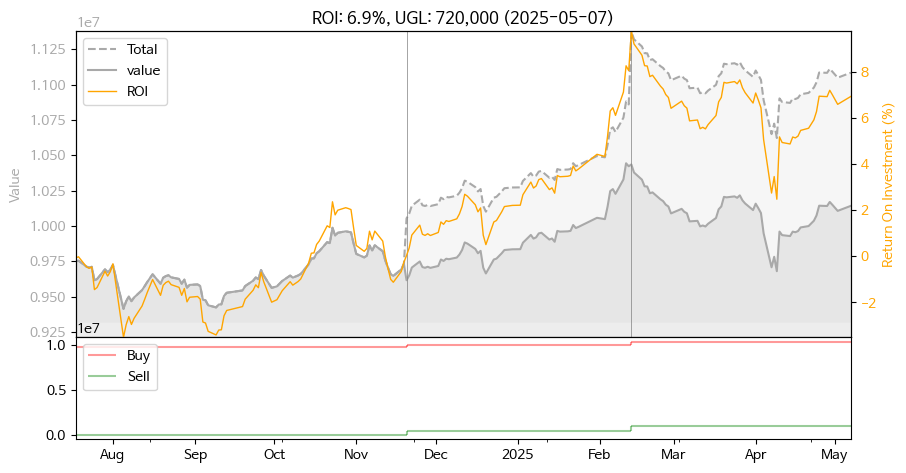

In [59]:
pf_wtr.plot(total=True)

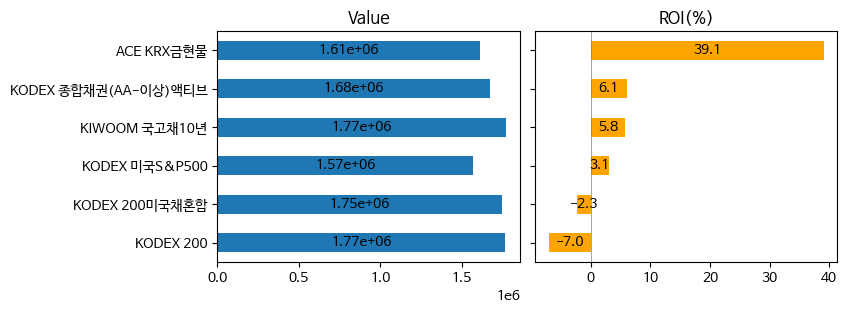

In [60]:
_ = pf_wtr.plot_assets(figsize=(8,3))

In [138]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-12-18, 2025-05-09, 5782957, 0.0, 6084226, 301269, 0.0521


start    2024-12-18
end      2025-05-09
buy       5,782,957
sell            0.0
value     6,084,226
ugl         301,269
roi          0.0521
dtype: object

In [89]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [90]:
#pf_wtr.performance(metrics=METRICS)

In [62]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [68]:
capital = WidgetTransaction.values(1)
#capital = 0.1
    
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = capital,
    save = WidgetTransaction.values(2),
    date_actual=date_actual
)

_ = pf_wtr.transaction_pipeline(**kw)
pf_wtr.view_record(-2, nshares=True)

6 tickers selected by Selected from 2025-05-07 to 2025-05-07
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 1 %
ROI: 6.8%, UGL: 720,086 (2025-05-07)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34061            1   51  0.1667   
           148070         KIWOOM 국고채10년  115030            1   15  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20153            1   87  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   
2025-05-07 069500             KODEX 200   34255           -2   49  0.1667   
           148070         KIWOOM 국고채10년  118045            0   14  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  119720            0   14  0.1667   
           284430        KODEX 200미국채혼합   13065           -5  129  0.1667   
           379800        KODEX 미국S&P500   17975            6   94  0.1667   
           411060            ACE KRX금현물   21515            3   78  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.168 2025-02-14  
           148070    0.165 2025-02-14  
           273130    0.157 2025-02-14  
           284430    0.168 2025-02-14  
           379800    0.168 2025-02-14  
           411060    0.173 2025-02-14  
2025-05-07 069500    0.167 2025-08-14  
           148070    0.164 2025-08-14  
           273130    0.167 2025-08-14  
           284430    0.168 2025-08-14  
           379800    0.168 2025-08-14  
           411060    0.167 2025-08-14

In [69]:
pf_wtr.valuate(total=False)

,name,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,,
411060,ACE KRX금현물,2024-07-18,2025-05-07,"1,710,123","675,534","1,677,525","642,936",0.3760
148070,KIWOOM 국고채10년,2024-07-18,2025-05-07,"1,783,417","234,999","1,651,995","103,577",0.0581
273130,KODEX 종합채권(AA-이상)액티브,2024-07-18,2025-05-07,"1,579,134",0.0,"1,675,436","96,302",0.0610
379800,KODEX 미국S&P500,2024-07-18,2025-05-07,"1,788,035","150,269","1,689,000","51,234",0.0287
284430,KODEX 200미국채혼합,2024-07-18,2025-05-07,"1,790,520","65,303","1,684,737","-40,480",-0.0226
069500,KODEX 200,2024-07-18,2025-05-07,"1,899,161","90,344","1,675,332","-133,485",-0.0703


## LIQ

In [104]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-05-09 uploaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-01-03 loaded


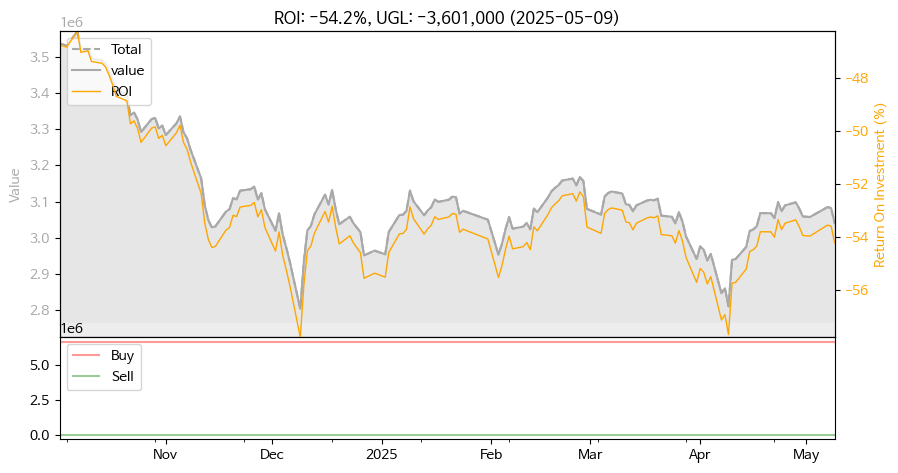

In [105]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

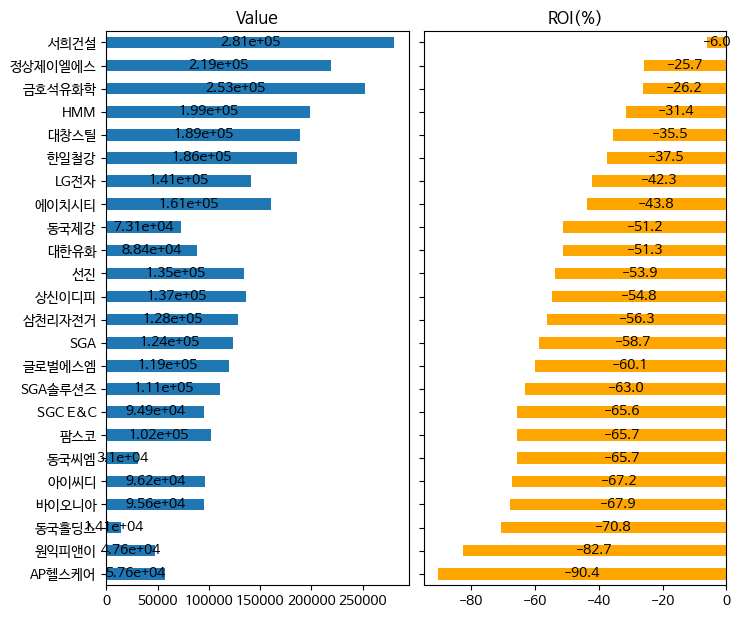

In [62]:
_ = pf_liq.plot_assets(figsize=(8,6))

In [106]:
pf_liq.valuate()

start    2024-01-03
end      2025-05-09
buy       6,641,836
sell            0.0
value     3,040,738
ugl      -3,601,098
roi          -0.542
dtype: object

In [60]:
#pf_liq.view_record()

## IRP

In [139]:
kw_st = dict(
    #security_names = fund_names
)

In [140]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-21 loaded


name  ratio  \
date       ticker                                                             
2025-04-21 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-04-21 K55101BV9571      6574306  6574306     NaN    0.142 2025-04-21  
           K55206C95800            0  4899682  0.1429    0.106 2024-04-17  
           K55213C50702            0  4823143  0.1429    0.105 2024-04-17  
           K55214CD4825      6574306  6574306     NaN    0.142 2025-04-21  
           K55234BY9966            0  4260709  0.1429    0.092 2024-04-17  
           K55234DF3150            0  4865649  0.1429    0.105 2024-04-17  
           K55301BU6139            0  4837744  0.1429    0.105 2024-04-17  
           K55301BU6253            0  4712837  0.1429    0.102 2024-04-17  
           K55364CF7048            0  4595360  0.1429    0.100 2024-04-17

In [49]:
#pf_tdf.check_universe()

In [50]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

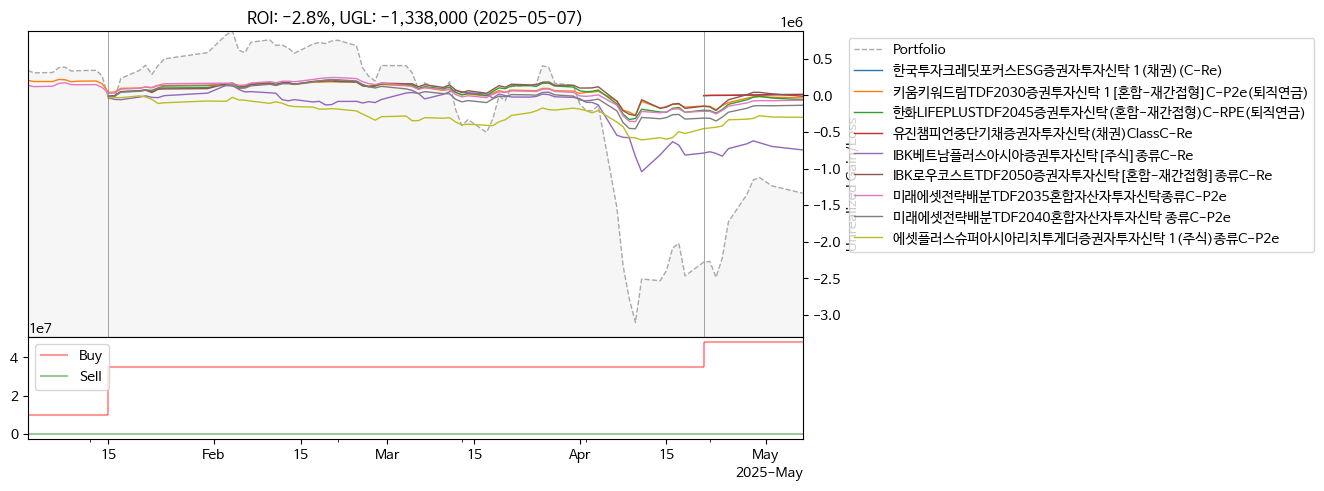

In [51]:
start = '2025-01-01'
pf_tdf.plot(start, total=False, roi=False)

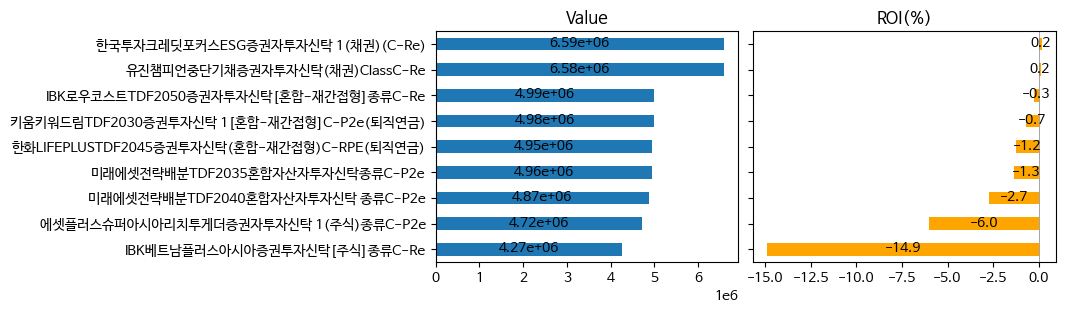

In [52]:
_ = pf_tdf.plot_assets(figsize=(8,3))

In [141]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-05-08, 48148612, -102860, 47070927, -1180545, -0.0245


start    2024-06-19
end      2025-05-08
buy      48,148,612
sell       -102,860
value    47,070,927
ugl      -1,180,545
roi         -0.0245
dtype: object

In [54]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
# new buy
date_actual='2024-04-17'
kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = {'K55214CD4825': 6574306, 'K55101BV9571':6574306}
)
#_ = pf_tdf.transaction_halt(**kw) 

In [53]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

9 tickers selected by Selected from 2025-05-02 to 2025-05-02
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: -1.8%, UGL: -917,666 (2025-05-02)
Set save=True to save transaction record


In [55]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-05-02 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-05-02 K55101BV9571     -1346266  5242850  0.1111    0.111 2025-05-02  
           K55206C95800       116263  5242850  0.1111    0.111 2025-05-02  
           K55213C50702       253272  5242850  0.1111    0.111 2025-05-02  
           K55214CD4825     -1341987  5242850  0.1111    0.111 2025-05-02  
           K55234BY9966       892520  5242850  0.1111    0.111 2025-05-02  
           K55234DF3150       207500  5242850  0.1111    0.111 2025-05-02  
           K55301BU6139       209773  5242850  0.1111    0.111 2025-05-02  
           K55301BU6253       361393  5242850  0.1111    0.111 2025-05-02  
           K55364CF7048       490383  5242850  0.1111    0.111 2025-05-02

## HANA

In [142]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [143]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [58]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

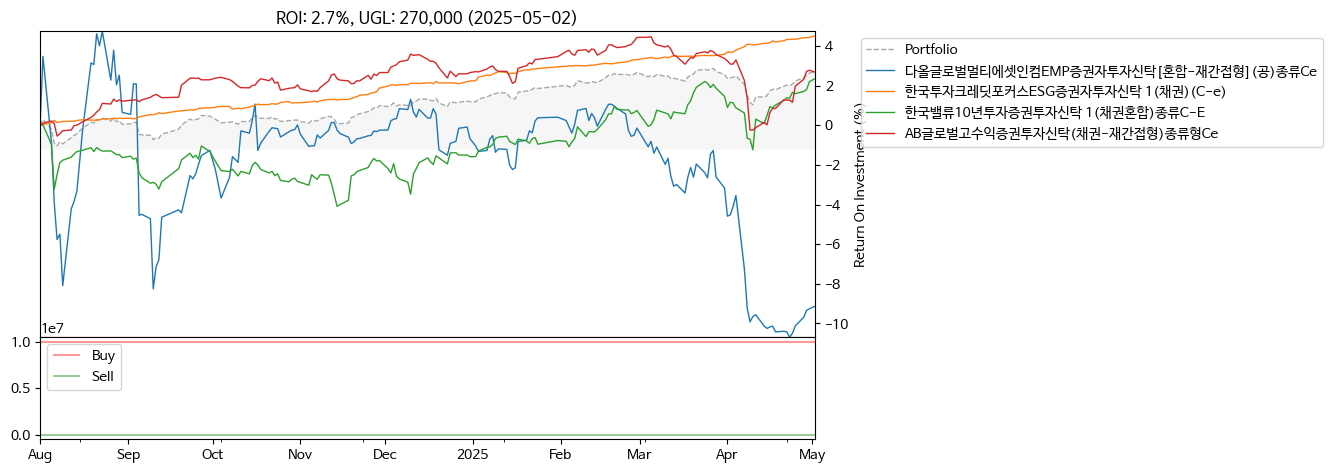

In [59]:
pf_hana.plot(total=False, roi=True)

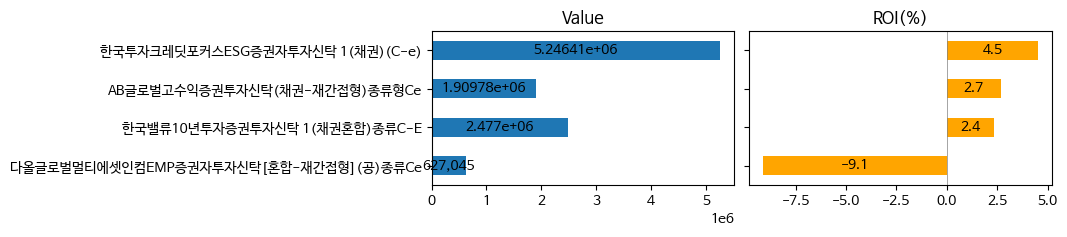

In [60]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

In [144]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-05-08, 9990000, 0.0, 10193310, 203310, 0.0204


start    2024-08-01
end      2025-05-08
buy       9,990,000
sell            0.0
value    10,193,310
ugl         203,310
roi          0.0204
dtype: object

In [20]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [21]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-04-17 to 2025-04-17
Weights of tickers determined by Inv.Vol.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 1.2%, UGL: 140,465 (2025-04-17)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-04-17 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-04-17 K55306CV9946      -217402   402756  0.0396    0.040 2025-04-17  
           KR5101888398      1420535  6653812  0.6542    0.654 2025-04-17  
           KR5236AS4826     -1060218  1381207  0.1358    0.136 2025-04-17  
           KR5370AP9956      -142916  1733003  0.1704    0.170 2025-04-17

## SAVE
연금저축

In [149]:
pf = 'SAVE_2503'
#pf = 'SAVE_2504'

In [150]:
kw_st = dict(
    security_names = fund_names
)

In [151]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)
pf_save.view_record()

23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-03-17 loaded


name  ratio  \
date       ticker                                                          
2025-03-17 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           K55206C11278                    키움더드림단기채증권투자신탁[채권]C-Pe      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-03-17 K55101D20874      1700000  1700000    0.25    0.241 2025-03-13  
           KR5235AK9808      1700000  1700000    0.25    0.241 2025-03-13  
           K55307DH1659      1700000  1700000    0.25    0.241 2025-03-13  
           K55206C11278      1967714  1967714    0.25    0.278 2025-03-13

In [51]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
#pf_save.update_record()

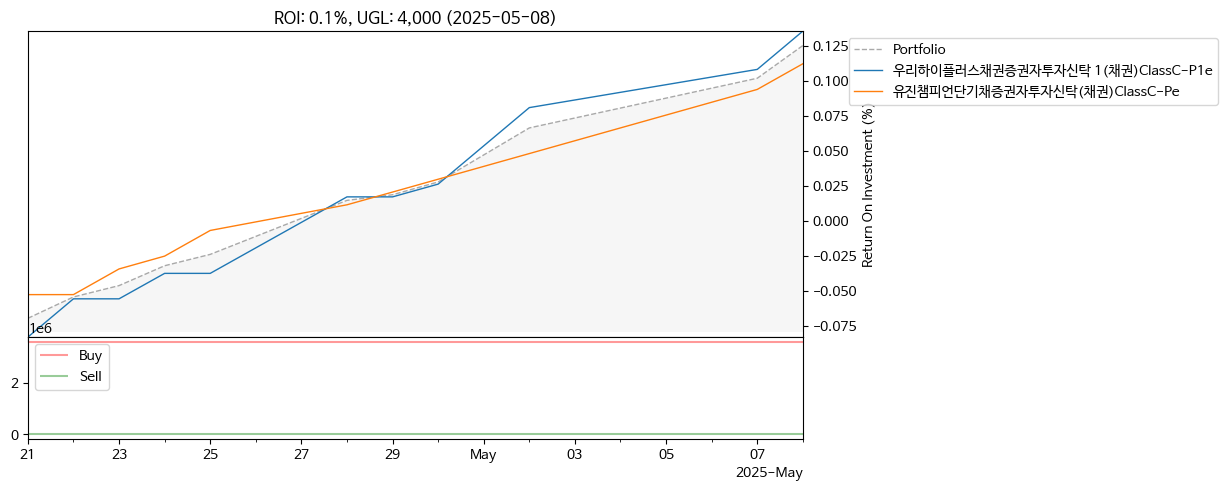

In [52]:
pf_save.plot(total=False, roi=True)

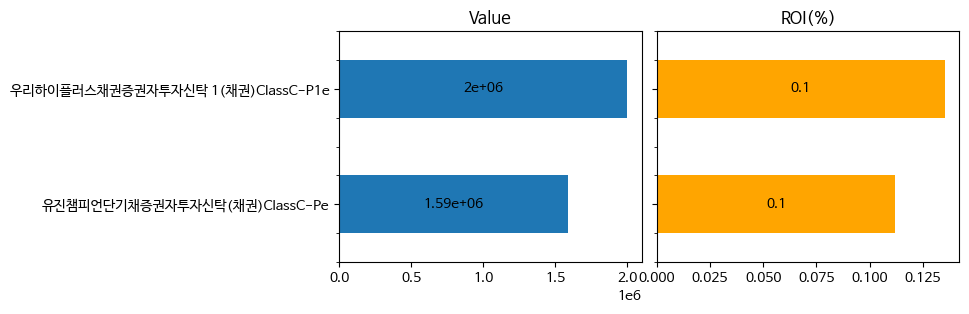

In [53]:
_ = pf_save.plot_assets(figsize=(8,3))

In [152]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-03-17, 2025-05-08, 7067714, 0.0, 7033198, -34516, -0.00488


start    2025-03-17
end      2025-05-08
buy       7,067,714
sell            0.0
value     7,033,198
ugl         -34,516
roi        -0.00488
dtype: object

In [17]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [27]:
date_actual='2024-04-17'

# new buy
#capital = {'K55107BU0252':2000000, 'K55214B30803':1584916}

capital = WidgetTransaction.values(1)

In [28]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = capital,
    date_actual = date_actual
)
_ = pf_save.transaction_pipeline(**kwargs)
pf_save.view_record()

2 tickers selected by Selected from 2024-10-22 to 2025-04-22
Weights of tickers determined by Equal weights.
Rebalancing by selling 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
ROI: 0.0%, UGL: 844.7527020242997 (2025-04-22)
Set save=True to save transaction record


name  ratio  transaction  \
date       ticker                                                               
2025-04-21 K55107BU0252  우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1      2000000   
           K55214B30803      유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1      1584916   
2025-04-22 K55107BU0252  우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1      -207833   
           K55214B30803      유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1       207833   

                             net  weight  weight*      date*  
date       ticker                                             
2025-04-21 K55107BU0252  2000000  0.5579    0.558 2025-04-21  
           K55214B30803  1584916  0.4421    0.442 2025-04-21  
2025-04-22 K55107BU0252  1792894  0.5000    0.500 2024-04-17  
           K55214B30803  1792894  0.5000    0.500 2024-04-17

## FISA

In [125]:
kw_st = dict(
    method_select = 'selected'    
)

In [126]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record()

23 securities from 2023-03-29 to 2025-05-08 uploaded.
Master data for 315 funds loaded.
Price data loaded
Cost data transaction_cost_250501.csv loaded
Transaction record to 2025-04-29 loaded


name  ratio  \
date       ticker                                                       
2025-04-28 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
2025-04-29 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-04-28 K55107BB0404     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5101888398     10000000  10000000  0.3226    0.435 2024-04-25  
           KR5236AS4818      3000000   3000000  0.0968    0.130 2024-04-25  
2025-04-29 K55107BB0404            0  10000934  0.3226    0.323 2024-04-25  
           K55210CO3737      5000000   5000000     NaN    0.161 2025-04-25  
           KR5101888398            0  10000000  0.3226    0.323 2024-04-25  
           KR5236AS4818            0   2990013  0.0968    0.096 2024-04-25  
           KR5370AP9949      3000000   3000000     NaN    0.097 2025-04-25

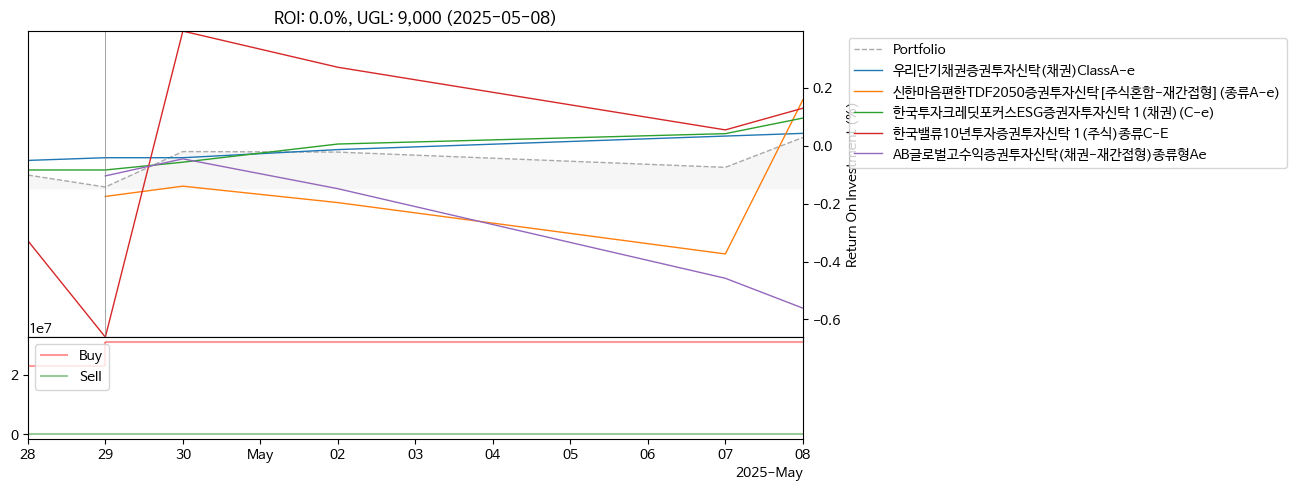

In [127]:
pf_fisa.plot(total=False, roi=True)

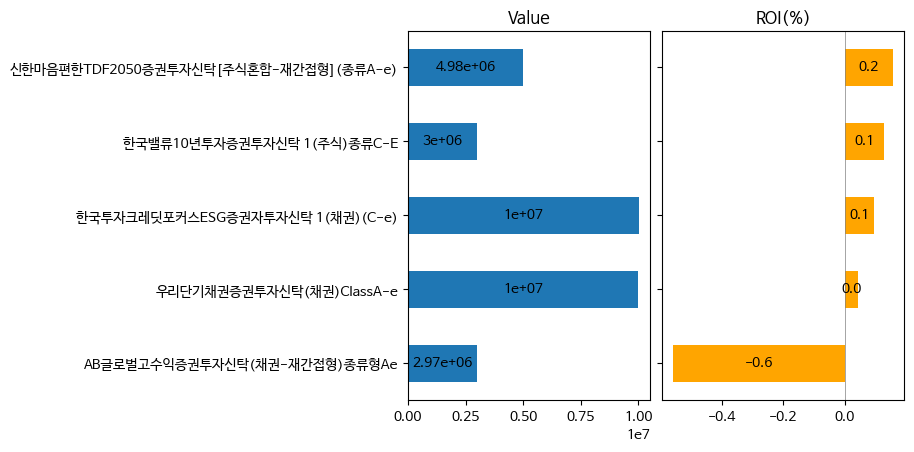

In [128]:
_ = pf_fisa.plot_assets(roi=True)

In [129]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-05-08, 30960600, -252.0, 30969738, 8886, 0.000287


start    2025-04-28
end      2025-05-08
buy      30,960,600
sell         -252.0
value    30,969,738
ugl           8,886
roi        0.000287
dtype: object

In [23]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
date_actual='2024-04-25'

# new buy
tickers = ['K55210CO3737','KR5370AP9949']
capital = [5e6, 3e6]
capital = dict(zip(tickers, capital))

kw = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    date_actual=date_actual,
    buy = capital
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record()

ERROR: No transaction record exits
ERROR: No transaction record


In [16]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
    capital = WidgetTransaction.values(1),
    #date_actual = date_actual
)
_ = pf_fisa.transaction_pipeline(**kwargs)

23 tickers selected by All from 2024-10-30 to 2025-04-30
Weights of tickers determined by Equal weights.
ERROR: Neither capital nor tickers to rebalance exists


## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

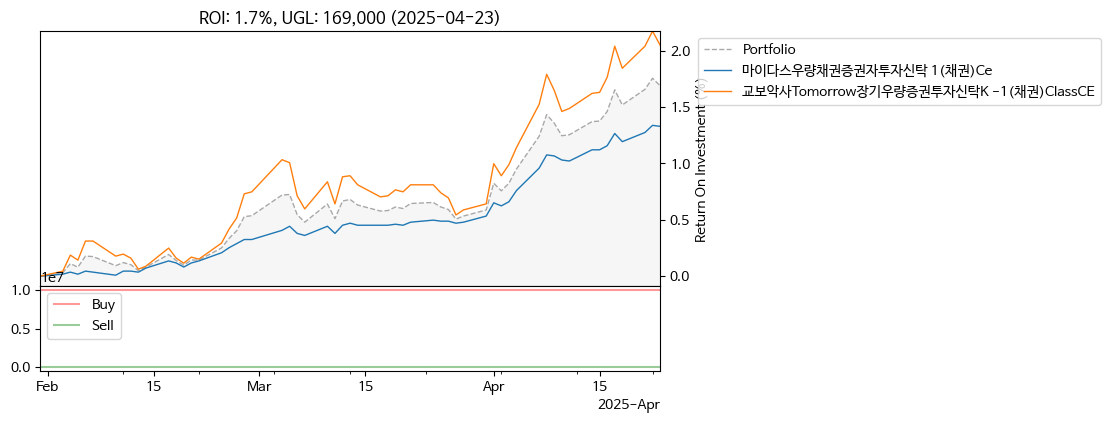

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

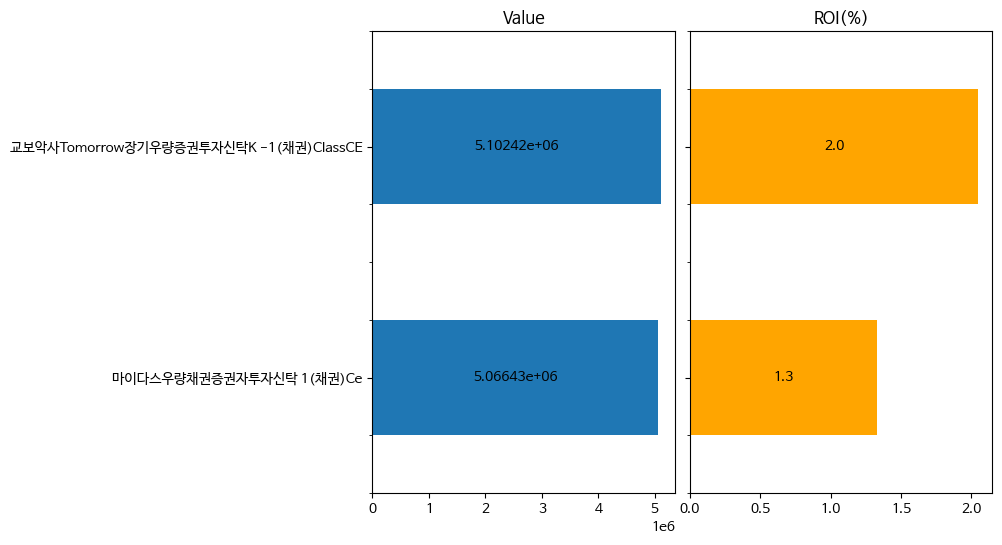

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing